# Abhinav Singh Katal
# Task 4 - Stock Market Prediction 

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
#Parsing the date into the datetime format and simultaneously load the data from the csv file and store it in sensex variable
dparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
sensex = pd.read_csv('BSE_data.csv', parse_dates = ['Date'], date_parser = dparser)
sensex.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-05,26379.419922,26822.419922,26375.310547,26785.550781,26785.550781,11400.0
1,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,26932.880859,13600.0
2,2015-10-07,26966.859375,27082.279297,26877.509766,27035.849609,27035.849609,17100.0
3,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,26845.810547,14900.0
4,2015-10-09,26974.919922,27200.439453,26910.589844,27079.509766,27079.509766,18800.0


In [4]:
# Check the data type of the date field
print(sensex['Date'].dtype)

datetime64[ns]


In [5]:
# Check the shape of the data
sensex.shape

(1231, 7)

In [6]:
# Checking if the data has any null or nan values
sensex['Close'].isnull().value_counts()

False    1227
True        4
Name: Close, dtype: int64

In [115]:
sensex['Open'].isnull().value_counts()

False    1160
True        4
Name: Open, dtype: int64

In [118]:
sensex.drop('Adj Close', axis = 1, inplace =True)

In [119]:
sensex.head()

,Date,Open,High,Low,Close,Volume
0,2015-10-05,26379.419922,26822.419922,26375.310547,26785.550781,11400.0
1,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,13600.0
2,2015-10-07,26966.859375,27082.279297,26877.509766,27035.849609,17100.0
3,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,14900.0
4,2015-10-09,26974.919922,27200.439453,26910.589844,27079.509766,18800.0


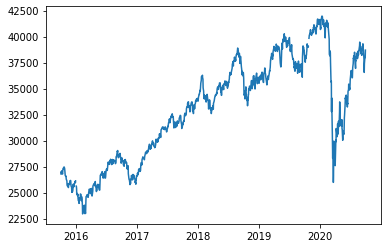

In [120]:
#Plotting a date vs close graph to see how the sensex has closed over the years. 
#Mostly it has been on the rising side except for the 2020 part most probably due to the corona pandemic
plt.plot(sensex["Date"], sensex['Close'])

In [121]:
# Filtering the dates according to the dates available for the news part and sensex both
filtr1 = (sensex['Date']>= '2015-10-05') & (sensex['Date']<= '2020-06-30')
sensex = sensex.loc[filtr1] # Applying the filter on the sensex data

In [122]:
sensex.head()

,Date,Open,High,Low,Close,Volume
0,2015-10-05,26379.419922,26822.419922,26375.310547,26785.550781,11400.0
1,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,13600.0
2,2015-10-07,26966.859375,27082.279297,26877.509766,27035.849609,17100.0
3,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,14900.0
4,2015-10-09,26974.919922,27200.439453,26910.589844,27079.509766,18800.0


In [123]:
sensex.tail()

,Date,Open,High,Low,Close,Volume
1159,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,26600.0
1160,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,24600.0
1161,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,24800.0
1162,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,18300.0
1163,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,18500.0


In [124]:
sensex1 = sensex.set_index('Date') # sets the index to Date column so that pairplot does not throw an error while plotting

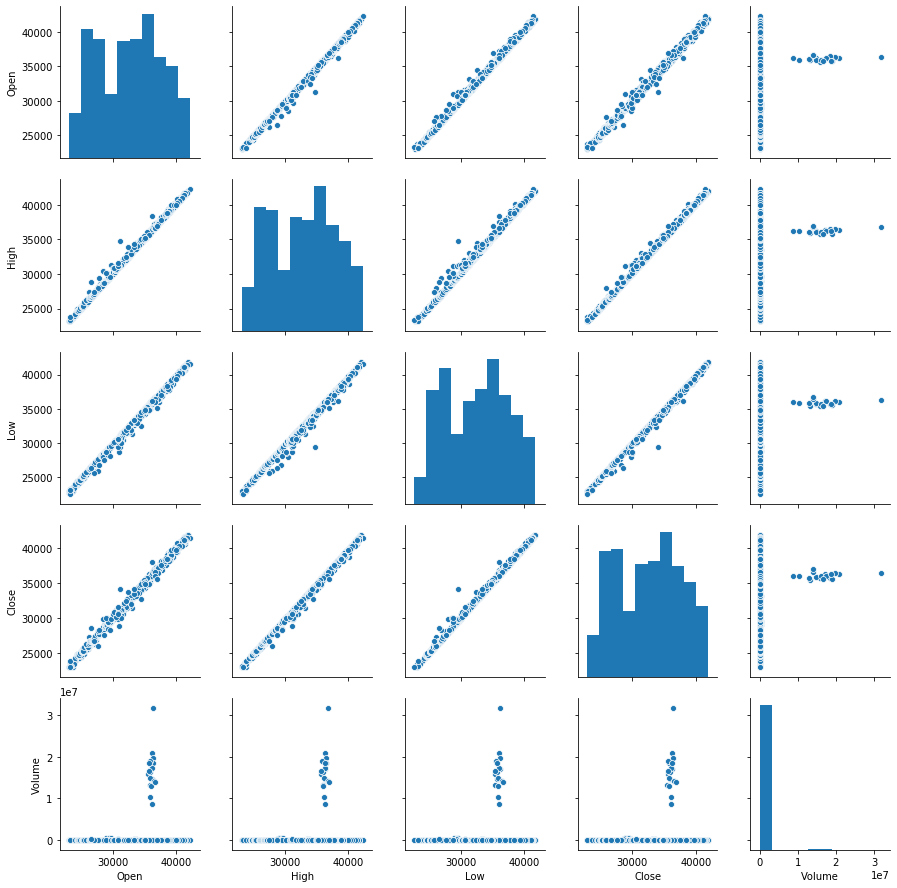

In [128]:
sns.pairplot(sensex1) # Pair plot is plotted so that we can get an idea what is the relation between different features of the data
plt.show()

In [15]:
# Importing the news headlines data and parsing the date field
newsdparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
news = pd.read_csv('india-news-headlines.csv', parse_dates = ['publish_date'], date_parser = newsdparse)
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [16]:
news['publish_date'].min()

Timestamp('2001-01-01 00:00:00')

In [17]:
news['publish_date'].max()

Timestamp('2020-06-30 00:00:00')

In [18]:
# Filetring the data based on min and max of sensex data and news data
filtr = (news['publish_date']>= '2015-10-05') & (news['publish_date']<= '2020-06-30')

In [19]:
news = news.loc[filtr] # Applying the filter

In [20]:
news.reset_index(inplace = True, drop = 'index') # resets the index to start again from 0, and drops the index column that is
#created after resetting the index

In [21]:
news.head()

,publish_date,headline_category,headline_text
0,2015-10-05,life-style.health-fitness.diet,10 foods bad for your skin
1,2015-10-05,life-style.relationships.man-woman,6 things great kissers do right
2,2015-10-05,life-style.food.food-features,5 ways to make your meal romantic
3,2015-10-05,life-style.health-fitness.fitness,6 mistakes of your asana
4,2015-10-05,life-style.fashion.buzz,15 fashion trends for the fashionista in you


In [22]:
# Making use of NLP, importing the tokenize method from notenize module from nltk library
from nltk.tokenize import word_tokenize

In [23]:
# Tokenizing the headlines and storing in the tokenized_text column
news['tokenized_text'] = news.apply(lambda row: word_tokenize(row['headline_text']), axis=1)

In [24]:
news.head()

,publish_date,headline_category,headline_text,tokenized_text
0,2015-10-05,life-style.health-fitness.diet,10 foods bad for your skin,"[10, foods, bad, for, your, skin]"
1,2015-10-05,life-style.relationships.man-woman,6 things great kissers do right,"[6, things, great, kissers, do, right]"
2,2015-10-05,life-style.food.food-features,5 ways to make your meal romantic,"[5, ways, to, make, your, meal, romantic]"
3,2015-10-05,life-style.health-fitness.fitness,6 mistakes of your asana,"[6, mistakes, of, your, asana]"
4,2015-10-05,life-style.fashion.buzz,15 fashion trends for the fashionista in you,"[15, fashion, trends, for, the, fashionista, i..."


In [ ]:
# We want only those news which is related to either 'sensex', 'BSE' or 'S&P'. So we can store these values into a list
#Then we can compare it with the tokenized_text column to extract only that news which has these words

In [25]:
searched_words = ['Sensex','S&P','BSE']
tokenized_text = news['tokenized_text'].to_list()

In [26]:
index1 = []
for i in range(len(tokenized_text)):
    for j in range(len(searched_words)):
        if searched_words[j] in tokenized_text[i]:
            index1.append(i)
print(index1)                                 

[435, 1204, 1378, 1846, 2540, 2727, 3263, 5169, 5942, 7394, 8065, 10183, 10966, 11619, 12888, 14462, 14465, 14530, 15081, 15881, 15906, 16557, 17190, 18157, 19461, 19921, 20219, 20458, 20673, 21441, 22101, 22817, 24833, 25335, 25374, 25605, 26461, 26504, 26699, 27608, 27677, 27781, 29753, 30235, 30500, 31193, 31844, 32019, 32438, 32561, 32749, 34601, 35417, 36845, 37278, 38026, 39418, 40220, 40980, 41734, 42358, 42364, 44358, 45165, 45819, 46388, 46585, 47665, 48702, 49202, 49632, 50046, 50459, 50647, 51497, 52068, 53673, 54230, 54404, 54972, 55588, 56300, 58435, 59062, 59874, 60561, 61264, 61896, 62217, 64031, 64776, 64972, 65330, 65874, 65995, 66628, 66731, 67321, 68764, 69466, 70410, 71658, 73563, 73914, 74075, 74386, 75246, 75757, 76180, 76602, 76862, 78510, 79753, 80044, 80599, 81329, 81854, 83399, 84277, 84421, 84939, 85719, 86327, 86395, 88263, 88746, 89041, 89251, 89770, 90202, 90249, 90480, 90892, 91149, 93229, 93245, 93677, 94069, 94711, 95432, 96169, 98154, 98822, 99077, 995

In [27]:
news = news.iloc[index1, 0:4]

In [28]:
news.head()

,publish_date,headline_category,headline_text,tokenized_text
435,2015-10-05,business.india-business,Sensex extends rally by 399 points on positive...,"[Sensex, extends, rally, by, 399, points, on, ..."
1204,2015-10-06,business.india-business,Sensex scales back 27K mark; surges 225 points...,"[Sensex, scales, back, 27K, mark, ;, surges, 2..."
1378,2015-10-06,business.india-business,Sensex trims initial gains; still up by 86 poi...,"[Sensex, trims, initial, gains, ;, still, up, ..."
1846,2015-10-07,business.india-business,Sensex up 34 points in opening trade on sustai...,"[Sensex, up, 34, points, in, opening, trade, o..."
2540,2015-10-08,business.india-business,Sensex opens in green; up 84 points,"[Sensex, opens, in, green, ;, up, 84, points]"


In [29]:
# Here we are using SentimentIntensityAnalyser method in the sentiment.vader(Valence Aware Dictionary for Sentiment Reasoning)
# It performs sentiment analysis on text and gives the polarity of the text and also the intensity of the polarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
news['Score'] = news['headline_text'].apply(vader.polarity_scores)
news

,publish_date,headline_category,headline_text,tokenized_text,Score
435,2015-10-05,business.india-business,Sensex extends rally by 399 points on positive...,"[Sensex, extends, rally, by, 399, points, on, ...","{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp..."
1204,2015-10-06,business.india-business,Sensex scales back 27K mark; surges 225 points...,"[Sensex, scales, back, 27K, mark, ;, surges, 2...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1378,2015-10-06,business.india-business,Sensex trims initial gains; still up by 86 poi...,"[Sensex, trims, initial, gains, ;, still, up, ...","{'neg': 0.173, 'neu': 0.667, 'pos': 0.16, 'com..."
1846,2015-10-07,business.india-business,Sensex up 34 points in opening trade on sustai...,"[Sensex, up, 34, points, in, opening, trade, o...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2540,2015-10-08,business.india-business,Sensex opens in green; up 84 points,"[Sensex, opens, in, green, ;, up, 84, points]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2727,2015-10-08,business.india-business,Sensex slips below 27;000; down 207 points,"[Sensex, slips, below, 27, ;, 000, ;, down, 20...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3263,2015-10-09,business.india-business,Sensex soars 325 points in early trade on glob...,"[Sensex, soars, 325, points, in, early, trade,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5169,2015-10-12,business.india-business,Sensex up 225 pts in opening trade; Infosys su...,"[Sensex, up, 225, pts, in, opening, trade, ;, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5942,2015-10-13,business.india-business,Sensex down 75 points despite positive economi...,"[Sensex, down, 75, points, despite, positive, ...","{'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'comp..."
7394,2015-10-15,business.india-business,Sensex rises 168 points in early trade on posi...,"[Sensex, rises, 168, points, in, early, trade,...","{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp..."


In [30]:
# Resetting the index
news.reset_index(inplace = True, drop = 'index')

In [31]:
news.head()

,publish_date,headline_category,headline_text,tokenized_text,Score
0,2015-10-05,business.india-business,Sensex extends rally by 399 points on positive...,"[Sensex, extends, rally, by, 399, points, on, ...","{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp..."
1,2015-10-06,business.india-business,Sensex scales back 27K mark; surges 225 points...,"[Sensex, scales, back, 27K, mark, ;, surges, 2...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2015-10-06,business.india-business,Sensex trims initial gains; still up by 86 poi...,"[Sensex, trims, initial, gains, ;, still, up, ...","{'neg': 0.173, 'neu': 0.667, 'pos': 0.16, 'com..."
3,2015-10-07,business.india-business,Sensex up 34 points in opening trade on sustai...,"[Sensex, up, 34, points, in, opening, trade, o...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2015-10-08,business.india-business,Sensex opens in green; up 84 points,"[Sensex, opens, in, green, ;, up, 84, points]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [93]:
# Extracting the 'compound' key value from the score, which gives the polarity as well as intensity of the text
sentiment = []
for i in range(len(news['Score'])):
    sentiment.append(news['Score'][i]['compound'])

In [94]:
news['Sentiment'] = sentiment
news

,publish_date,headline_category,headline_text,tokenized_text,Score,Sentiment
0,2015-10-05,business.india-business,Sensex extends rally by 399 points on positive...,"[Sensex, extends, rally, by, 399, points, on, ...","{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...",0.6249
1,2015-10-06,business.india-business,Sensex scales back 27K mark; surges 225 points...,"[Sensex, scales, back, 27K, mark, ;, surges, 2...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2015-10-06,business.india-business,Sensex trims initial gains; still up by 86 poi...,"[Sensex, trims, initial, gains, ;, still, up, ...","{'neg': 0.173, 'neu': 0.667, 'pos': 0.16, 'com...",-0.0516
3,2015-10-07,business.india-business,Sensex up 34 points in opening trade on sustai...,"[Sensex, up, 34, points, in, opening, trade, o...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,2015-10-08,business.india-business,Sensex opens in green; up 84 points,"[Sensex, opens, in, green, ;, up, 84, points]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,2015-10-08,business.india-business,Sensex slips below 27;000; down 207 points,"[Sensex, slips, below, 27, ;, 000, ;, down, 20...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
6,2015-10-09,business.india-business,Sensex soars 325 points in early trade on glob...,"[Sensex, soars, 325, points, in, early, trade,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,2015-10-12,business.india-business,Sensex up 225 pts in opening trade; Infosys su...,"[Sensex, up, 225, pts, in, opening, trade, ;, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
8,2015-10-13,business.india-business,Sensex down 75 points despite positive economi...,"[Sensex, down, 75, points, despite, positive, ...","{'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'comp...",-0.4449
9,2015-10-15,business.india-business,Sensex rises 168 points in early trade on posi...,"[Sensex, rises, 168, points, in, early, trade,...","{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.5574


In [132]:
sensex.head()

,Date,Open,High,Low,Close,Volume
0,2015-10-05,26379.419922,26822.419922,26375.310547,26785.550781,11400.0
1,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,13600.0
2,2015-10-07,26966.859375,27082.279297,26877.509766,27035.849609,17100.0
3,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,14900.0
4,2015-10-09,26974.919922,27200.439453,26910.589844,27079.509766,18800.0


In [133]:
#Creating a new dataframe which contains only the date and the sentiment column from the news dataframe
news_new = news[['publish_date','Sentiment']]

In [134]:
# Renaming the publish_date column to Date. Same as in the sensex dataframe 
news_new.rename(columns = {'publish_date': 'Date'}, inplace = True)

In [135]:
news_new.head()

,Date,Sentiment
0,2015-10-05,0.6249
1,2015-10-06,0.0000
2,2015-10-06,-0.0516
3,2015-10-07,0.0000
4,2015-10-08,0.0000


In [136]:
# Merging the sensex data with the news sentiment data based on 'Date' column, left join.
data = pd.merge(sensex,news_new,on = 'Date', how = 'left')

In [137]:
data

,Date,Open,High,Low,Close,Volume,Sentiment
0,2015-10-05,26379.419922,26822.419922,26375.310547,26785.550781,11400.0,0.6249
1,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,13600.0,0.0000
2,2015-10-06,26976.660156,27010.269531,26751.250000,26932.880859,13600.0,-0.0516
3,2015-10-07,26966.859375,27082.279297,26877.509766,27035.849609,17100.0,0.0000
4,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,14900.0,0.0000
5,2015-10-08,27116.859375,27120.109375,26762.359375,26845.810547,14900.0,0.0000
6,2015-10-09,26974.919922,27200.439453,26910.589844,27079.509766,18800.0,0.0000
7,2015-10-12,27242.599609,27305.039063,26855.750000,26904.109375,18400.0,0.0000
8,2015-10-13,26874.289063,26918.519531,26719.099609,26846.529297,10800.0,-0.4449
9,2015-10-14,26760.320313,26869.080078,26713.279297,26779.660156,10900.0,NaN


In [138]:
# Filling the nan as 0
data['Sentiment'] = data['Sentiment'].fillna(0)

In [139]:
# Dropping the missing value rows in the whole data
data.dropna(inplace = True)

In [140]:
# Storing the independent and dependent variables
X = data[['Open', 'High', 'Low', 'Sentiment']]
y = data['Close']     

In [147]:
# Importing the train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [148]:
# Importing the linear regression method to create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
model.score(X_test, y_test) # Tests the accuracy score

0.9994162908267002

In [151]:
model.predict([[26842.18, 27037.90, 26836.76, 0.55]]) # predicting based on the open, high, low and sentiment value.

array([27013.14915674])

In [ ]:
#27013.149 is the model value and 27010.140 is the actual value.